In [2]:
from google.colab import files
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019 (1).csv


In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import pandas as pd
import seaborn as sns


In [4]:

ab_nyc_data = pd.read_csv("AB_NYC_2019.csv")
ab_nyc_df = pd.DataFrame(ab_nyc_data)

# Data Cleaning
ab_nyc_df.reviews_per_month = ab_nyc_df.reviews_per_month.fillna(0)
ab_nyc_df.isna().sum()
ab_nyc_df = ab_nyc_df.drop(['id','name','host_name','host_id','last_review'],axis=1)
ab_nyc_df.shape

(48895, 11)

In [5]:
ab_nyc_df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

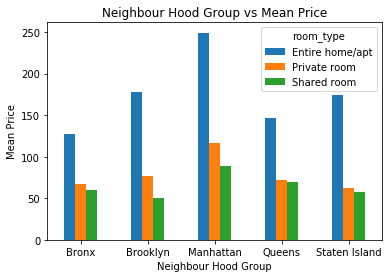

In [6]:
# Exploratory data Analysis

# Relationship between Neighbourhood Group, Room Type and Price
neighbourhood_df = ab_nyc_df.groupby(['neighbourhood_group','room_type'])["price"].mean().unstack()
axes = neighbourhood_df.plot.bar(rot=0)
plt.title('Neighbour Hood Group vs Mean Price')  
plt.xlabel('Neighbour Hood Group')  
plt.ylabel('Mean Price')  
plt.show()

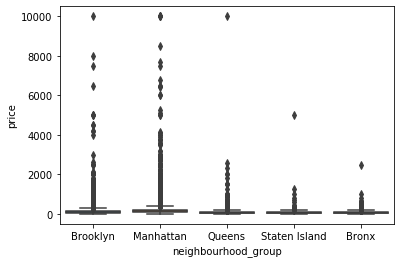

In [7]:
# Relationship between Neighbourhood Group and Price
sns.boxplot(x='neighbourhood_group', y='price', data=ab_nyc_df)

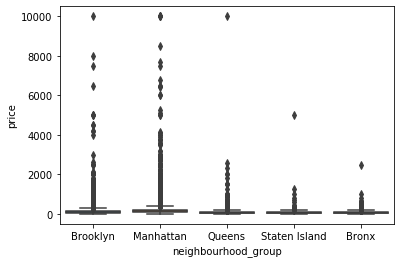

In [9]:
# Relationship between Neighbourhood Group and Price
sns.boxplot(x='neighbourhood_group', y='price', data=ab_nyc_df)


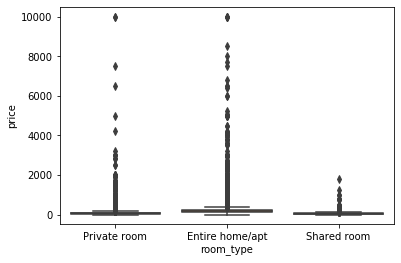

In [12]:
# Relationship between Room Type and Price
sns.boxplot(x='room_type', y='price', data=ab_nyc_df)

In [0]:
# Data Normalization is needed as many outliers are seen in the data
def normalize_outliers(data):
    threshold = 2
    for col in data.columns:
      normalized_data = []
      mean = np.mean(data[col])
      std = np.std(data[col])
      for y in data[col]:
          z_score= (y - mean)/std
          if np.abs(z_score) > threshold:
            normalized_data.append(mean)
          else:
            normalized_data.append(y)
      data[col] = normalized_data
    return data

In [0]:
def feature_scaling(data):
   return  ((data - data.mean()) / data.std())

In [0]:
corr_df = ab_nyc_df.copy()
# Feature Scaling
corr_df['neighbourhood_group'] = corr_df.neighbourhood_group.astype("category").cat.codes
corr_df['room_type'] = corr_df.room_type.astype("category").cat.codes
corr_df['neighbourhood'] = corr_df.neighbourhood.astype("category").cat.codes
corr_df = feature_scaling(corr_df)
# normalization 
corr_df = normalize_outliers(corr_df)

In [0]:
# correlation heatmap
corr = corr_df.corr()
plt.figure(figsize=(12,10)) 
sns.heatmap(corr, annot=True)


In [0]:
# split data into train and test
df = corr_df
X = df.drop(['price'],axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [0]:
def calculateRMSE(actual,pred):
    rmse = np.sqrt(metrics.mean_squared_error(actual,pred))
    return round(rmse,2)

In [19]:
# Apply linear Regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
rmse = round(calculateRMSE(y_test,y_pred),2)
mape = metrics.mean_absolute_error(y_test,y_pred)
accuracy = round(1 - mape,2) * 100

print('RMSE for Linear Regression: ',rmse)
print('Accuracy:', accuracy, '%.')

RMSE for Linear Regression:  0.3
Accuracy: 79.0 %.


In [20]:
# Apply Random Forest

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train);
train_pred = rf.predict(X_train)
predictions = rf.predict(X_test)

rmse = round(calculateRMSE(y_test,predictions),2)
mape = metrics.mean_absolute_error(y_test,predictions)
accuracy = round(1 - mape,2) * 100

print('RMSE for Random Forest:', rmse)
print('Accuracy:', accuracy, '%.')


RMSE for Random Forest: 0.28
Accuracy: 82.0 %.


In [0]:
# Apply XGBoost

model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
train_pred = model.fit(X_train, y_train)
test_pred = model.predict(X_test)

rmse = round(calculateRMSE(y_test,test_pred),2)
mape = metrics.mean_absolute_error(y_test,test_pred)
accuracy = round(1 - mape,2) * 100

print('RMSE for XGBoost:', rmse)
print('Accuracy:', accuracy, '%.')